# Chinhoyi University of Technology


# Student Name:                       Charles Mapfidza


# Registration Number:            C21146295S


# Course Code:                          MSCDA605


# Course Name:                         Machine Learning Techniques


# Individual Project Assignment: Data Analytics Creativity and Innovation Challenge

Showcase any data analytics of your choice using Machine Learning/Deep learning to demonstrate your understanding and skills you have acquired in Machine Learning. The point of this exercise is to showcase your creativity and innovation with data analytics. 
This project must be a masterpiece of data analytics. You are free to use any Machine learning algorithm of your choice, but you are still restricted to using Zimbabwean datasets only. Submit this project as a detailed Jupyter Notebook with all the project
outputs with either your dataset or a link to where the dataset can be downloaded. Your student registration number should be clearly stated in the notebook.

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Objective-of-the-Data-Analytics" data-toc-modified-id="Objective-of-the-Data Analytics-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objective of the Data Analytics</a></div><div class="lev1 toc-item"><a href="#Data-Source" data-toc-modified-id="Data-Source-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Source</a></div><div class="lev2 toc-item"><a href="#Importing-necessary-libraries" data-toc-modified-id="Importing-necessary-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing necessary libraries</a></div><div class="lev2 toc-item"><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data-Preprocessing</a></div><div class="lev2 toc-item"><a href="#Cardinality-check" data-toc-modified-id="Cardinality check-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cardinality check</a></div><div class="lev1 toc-item"><a href="#Handling-Missing-Values" data-toc-modified-id="Handling-Missing-Values-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Handling-Missing-Values</a></div><div class="lev2 toc-item"><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exploratory Data Analysis</a></div><div class="lev2 toc-item"><a href="#Encoding-of-Categorical-Features" data-toc-modified-id="Encoding-of-Categorical-Features-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Encoding of Categorical Features</a></div><div class="lev2 toc-item"><a href="#Correlation" data-toc-modified-id="Correlation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Correlation</a></div><div class="lev1 toc-item"><a href="#Checking-Feature-Importance" data-toc-modified-id="Checking-Feature-Importance-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Checking Feature Importance</a></div><div class="lev2 toc-item"><a href="#Splitting-Data-into-training-and-testing-set" data-toc-modified-id="Splitting-Data-into-training-and-testing-set-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Splitting Data into training and testing set</a></div><div class="lev2 toc-item"><a href="#Feature-Scaling" data-toc-modified-id="Feature-Scaling-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Feature Scaling</a></div><div class="lev2 toc-item"><a href="#Model-Building" data-toc-modified-id="Model-Building-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Model Building</a></div><div class="lev2 toc-item"><a href="#Conclusion-and-Remarks" data-toc-modified-id="Conclusion-and-Remarks-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Conclusion and Remarks</a></div><div class="lev2 toc-item"><a href="#References" data-toc-modified-id="References-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>References</a></div>

# Objective of the Data Analytics

This is a predictive model on a Harare weather dataset to predict whether or not it will rain tomorrow in Harare. The dataset contains more than 14 years of daily weather observations in Harare. This includes the temperatures (maximum, minimum and average), precipitation (rain), wind speed, wind direction, visibility, cloud cover and the relative humidity. This is a classification problem which can be solved through Logistic Regression. Logistic regression is one of the Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables as in this case.

Availability of water in Harare households is a big challenge to an extend that most households with reasonable income have decided to drill boreholes. After long dry spells between April and November, most boreholes have gone dry and are in need of replenishment from rain water. A machine learning model with a reasonable level of prediction accuracy would help in making sure an adequate amount of resources can also be allocated for either rainwater harvesting or households can plan accordingly regarding where to get the precious liquid.

In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1) as shown below (adopted from Lecture Notes).

![logistic regression](http://www.saedsayad.com/images/LogReg_1.png)

# Data Source

The dataset is taken from https://www.visualcrossing.com/weather/weather-data-services#/viewData and contains 14 years of daily weather observations from Harare. Historical data stretching for decades is available including hourly records is available at a cost. With a free account, I am restricted to pulling out 1000 records per day in batches of 250. It was therefore not practical to extract hourly data stretching over a long period of time. Addition of more data did not significantly change the accuracy of the model. The Raining Today and Raining tomorrow columns were added and values derived from the Precipitation column based on whether there is precipitation or not. If precipitation was recorded the value of was set to 'Yes' otherwise value was set to 'No'.

# Importing necessary libraries

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the Data Set
rain_data = pd.read_csv('Harare_Weather.csv')

In [3]:
#Checking the data
rain_data.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,Raining Today,Raining Tomorrow
0,"Harare, Zimbabwe",2007-09-01,29.9,10.9,21.2,NaN,28.1,0.0,NaN,NaN,16.6,NaN,NaN,12.4,0.0,26.79,Clear,No,No
1,"Harare, Zimbabwe",2007-09-02,27.6,11.1,19.4,NaN,26.3,0.0,NaN,NaN,10.7,NaN,NaN,9.6,0.0,31.67,Clear,No,No
2,"Harare, Zimbabwe",2007-09-03,28.6,15.2,22.5,NaN,27.1,0.0,NaN,NaN,21.4,NaN,NaN,8.2,0.0,12.55,Clear,No,No
3,"Harare, Zimbabwe",2007-09-04,26.2,11.2,19.7,NaN,NaN,0.0,NaN,NaN,25.0,NaN,NaN,8.3,0.0,27.79,Clear,No,No
4,"Harare, Zimbabwe",2007-09-05,27.1,12.9,20.1,NaN,26.1,0.0,NaN,NaN,14.8,NaN,NaN,7.0,0.0,34.86,Clear,No,No


In [4]:
# Checking the Dimensions of Dataset
rain_data.shape

(5174, 19)

This data set consists of 5174 rows and 19 columns, with Raining Tommorw being the dependent variable.


# Data Preprocessing

Collected data is often messy, incomplete, unstructured, inconsistent and redundant. Data Preprocessing techniques help to gain insights from raw data and makes sure that data is clean, organized and compatible with the Machine Learning model.

In [5]:
# Extracting a concise summary of the Dataset
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5174 entries, 0 to 5173
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 5174 non-null   object 
 1   Date time            5174 non-null   object 
 2   Maximum Temperature  4737 non-null   float64
 3   Minimum Temperature  4737 non-null   float64
 4   Temperature          4737 non-null   float64
 5   Wind Chill           961 non-null    float64
 6   Heat Index           1885 non-null   float64
 7   Precipitation        5174 non-null   float64
 8   Snow                 0 non-null      float64
 9   Snow Depth           0 non-null      float64
 10  Wind Speed           4733 non-null   float64
 11  Wind Direction       4610 non-null   float64
 12  Wind Gust            224 non-null    float64
 13  Visibility           4736 non-null   float64
 14  Cloud Cover          4737 non-null   float64
 15  Relative Humidity    4737 non-null   f

The Dataset has two data types: float64 and object. With the exception of the Date time, Name, Precipitation, Raining Today and Raining Tomorrow columns, every column has missing values that need to be fixed. Now generating descriptive statistics for the dataset using the function describe() in pandas to summarize and describe the features of data in a meaningful way to extract insights.

In [6]:
rain_data.describe(exclude=[object])

,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity
count,4737.000000,4737.000000,4737.000000,961.000000,1885.000000,5174.000000,0.0,0.0,4733.000000,4610.000000,224.000000,4736.000000,4737.000000,4737.000000
mean,25.318683,13.602934,19.404602,5.833611,28.173846,2.155597,NaN,NaN,19.659539,110.637525,39.941964,14.239696,31.975744,61.500973
std,3.830874,4.270413,3.576462,2.292202,1.345800,9.215945,NaN,NaN,7.919653,40.620109,8.907745,4.354866,30.872124,16.527259
min,7.100000,-23.000000,7.100000,-34.900000,25.800000,0.000000,NaN,NaN,0.000000,13.000000,22.300000,3.300000,0.000000,12.550000
25%,23.000000,10.100000,16.900000,4.500000,27.300000,0.000000,NaN,NaN,14.800000,80.730000,33.500000,11.900000,2.900000,49.410000
50%,26.000000,14.100000,20.000000,6.200000,27.900000,0.000000,NaN,NaN,18.400000,106.485000,38.900000,13.500000,21.200000,62.370000
75%,28.000000,17.000000,21.900000,7.300000,28.900000,0.000000,NaN,NaN,22.300000,132.265000,44.300000,15.600000,59.000000,74.050000
max,36.200000,33.100000,33.100000,9.500000,35.600000,293.100000,NaN,NaN,187.200000,357.000000,94.300000,42.200000,100.000000,100.000000


Minimum Temperature ranges from -23 to 33 degrees celsius with a standard deviation of 4.3. The hottest day in Harare had 36.2 Degrees Celsius. 
Maximum precipitation received over the period is 293.1mm in a single day.

In [7]:
rain_data.describe(include=[object])

,Name,Date time,Conditions,Raining Today,Raining Tomorrow
count,5174,5174,4737,5174,5174
unique,1,5173,6,2,2
top,"Harare, Zimbabwe",12/4/2014,Clear,No,No
freq,5174,2,2456,4251,4251


In [8]:
#Finding Categorical Features in the Data set
cat_features = [col_name for col_name in rain_data.columns if rain_data[col_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(cat_features)))
print("Categorical Features: ",cat_features)

Number of Categorical Features: 5
Categorical Features:  ['Name', 'Date time', 'Conditions', 'Raining Today', 'Raining Tomorrow']


The data has 5 categorical features

In [9]:
#Finding Numerical Features in the Data set
num_features = [col_name for col_name in rain_data.columns if rain_data[col_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(num_features)))
print("Numerical Features: ",num_features)

Number of Numerical Features: 14
Numerical Features:  ['Maximum Temperature', 'Minimum Temperature', 'Temperature', 'Wind Chill', 'Heat Index', 'Precipitation', 'Snow', 'Snow Depth', 'Wind Speed', 'Wind Direction', 'Wind Gust', 'Visibility', 'Cloud Cover', 'Relative Humidity']


The dataset has 14 numerical features

# Cardinality check

Cardinality is the number of distinct values in each categorical feature. A feature with a high number of distinct values is a high cardinality feature. A high cardinality feature poses many serious problems as it will increase the number of dimensions of data when that feature is encoded. Since this is not good for the Machine Learning model, a high cardinality can be handled through feature engineering or simply dropping that feature if it doesn’t add any value to the model. 

In [10]:
# Cardinality check for Categorical features
for each_feature in cat_features:
   unique_values = len(rain_data[each_feature].unique())
   print("No. of unique values of {} is: {}".format(each_feature, unique_values))

No. of unique values of Name is: 1
No. of unique values of Date time is: 5173
No. of unique values of Conditions is: 7
No. of unique values of Raining Today is: 2
No. of unique values of Raining Tomorrow is: 2


The Date time column has high cardinality which poses several problems to the model in terms of efficiency and also dimensions of data increase when encoded to numerical data. The Name column refers to location, Harare and has no influence on the model. It would have had an impact if data from various locations was available for analysis. The Date time column will be engineered to come up with years, months and days to reduce the cardinality.
The Name will be dropped. The conditions feature which describes the weather including whether it is raining or not so it is not significant to our model, and will also be dropped. 

In [11]:
# Feature Engineering of Date column to decrease high cardinality:
rain_data['Date time'] = pd.to_datetime(rain_data['Date time'])
YEAR = []
MONTH = []
DAY = []
for i in range(len(rain_data)):
    DAY.append(rain_data['Date time'][i].day)
    MONTH.append(rain_data['Date time'][i].month)
    YEAR.append(rain_data['Date time'][i].year)

rain_data['Year'] = YEAR
rain_data['Month'] = MONTH
rain_data['Day'] = DAY 

In [12]:
# Drop Date column
rain_data.drop(columns = {'Name','Date time','Conditions'},axis = 1, inplace = True)
rain_data.head()

,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Raining Today,Raining Tomorrow,Year,Month,Day
0,29.9,10.9,21.2,NaN,28.1,0.0,NaN,NaN,16.6,NaN,NaN,12.4,0.0,26.79,No,No,2007,9,1
1,27.6,11.1,19.4,NaN,26.3,0.0,NaN,NaN,10.7,NaN,NaN,9.6,0.0,31.67,No,No,2007,9,2
2,28.6,15.2,22.5,NaN,27.1,0.0,NaN,NaN,21.4,NaN,NaN,8.2,0.0,12.55,No,No,2007,9,3
3,26.2,11.2,19.7,NaN,NaN,0.0,NaN,NaN,25.0,NaN,NaN,8.3,0.0,27.79,No,No,2007,9,4
4,27.1,12.9,20.1,NaN,26.1,0.0,NaN,NaN,14.8,NaN,NaN,7.0,0.0,34.86,No,No,2007,9,5


# Handling Missing Values

The Machine learning algorithm cannot handle missing values and this causes problems. Below we identify and impute missing values. The missing values get replaced with NaN (Not a Number) values when loaded with pandas. These NaN values can be identified using methods like isna() or isnull() and they can be imputed using fillna() through the process known as Missing Data Imputation.

In [13]:
# Identifying Missing values in Categorical Features
cat_features = [col_name for col_name in rain_data.columns if rain_data[col_name].dtype == 'O']
rain_data[cat_features].isnull().sum()

Raining Today       0
Raining Tomorrow    0
dtype: int64

There are no missing categorical features in the dataset.

In [14]:
# Identifying Missing values in Numerical features
num_features = [col_name for col_name in rain_data.columns if rain_data[col_name].dtype != 'O']
rain_data[num_features].isnull().sum()

Maximum Temperature     437
Minimum Temperature     437
Temperature             437
Wind Chill             4213
Heat Index             3289
Precipitation             0
Snow                   5174
Snow Depth             5174
Wind Speed              441
Wind Direction          564
Wind Gust              4950
Visibility              438
Cloud Cover             437
Relative Humidity       437
Year                      0
Month                     0
Day                       0
dtype: int64

Missing values in Numerical Features can be imputed using the Mean or the Median. Mean is sensitive to outliers and median is immune to outliers. To impute the missing values with mean values, then outliers in numerical features, if any, need to be addressed properly. Below we try to identify if the datset has any outliers among the numerical features.

However, the following features have a lot of missing values to the extent that imputing them with the mean will likely not affect how the model will perform: Wind Chill, Heat Index, Snow (no values at all), Snow Depth (no values at all) and Wind Gust. These features will be dropped and the remaining features imputed.

In [15]:
#Dropping the columns
rain_data.drop(columns = {'Snow', 'Snow Depth','Wind Chill','Heat Index','Wind Gust'}, inplace = True)

In [16]:
#Outliers detection and treatment
features_with_outliers = ['Maximum Temperature', 'Minimum Temperature', 'Temperature', 
                          'Wind Speed', 'Wind Direction', 'Visibility', 
                          'Cloud Cover', 'Relative Humidity']
for feature in features_with_outliers:
    q1 = rain_data[feature].quantile(0.25)
    q3 = rain_data[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    rain_data.loc[rain_data[feature]<lower_limit,feature] = lower_limit
    rain_data.loc[rain_data[feature]>upper_limit,feature] = upper_limit

Based on the outcome from the above script, the numerical features are free from outliers. Therefore missing values in numerical features will be imputed using mean.

In [17]:
#Reloading the new numerical features in the dataset
num_features = [col_name for col_name in rain_data.columns if rain_data[col_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(num_features)))
print("Numerical Features: ",num_features)

Number of Numerical Features: 12
Numerical Features:  ['Maximum Temperature', 'Minimum Temperature', 'Temperature', 'Precipitation', 'Wind Speed', 'Wind Direction', 'Visibility', 'Cloud Cover', 'Relative Humidity', 'Year', 'Month', 'Day']


There are now 12 numerical features.

In [18]:
# Imputing missing values in numerical features using mean.
num_features_with_null = [feature for feature in num_features if rain_data[feature].isnull().sum()]
for feature in num_features_with_null:
    mean_value = rain_data[feature].mean()
    rain_data[feature].fillna(mean_value,inplace=True)

In [19]:
rain_data[num_features].isnull().sum()

Maximum Temperature    0
Minimum Temperature    0
Temperature            0
Precipitation          0
Wind Speed             0
Wind Direction         0
Visibility             0
Cloud Cover            0
Relative Humidity      0
Year                   0
Month                  0
Day                    0
dtype: int64

All missing values have been imputed.

In [20]:
rain_data

,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Raining Today,Raining Tomorrow,Year,Month,Day
0,29.9,10.9,21.2,0.0,16.60,109.518674,12.4,0.0,26.79,No,No,2007,9,1
1,27.6,11.1,19.4,0.0,10.70,109.518674,9.6,0.0,31.67,No,No,2007,9,2
2,28.6,15.2,22.5,0.0,21.40,109.518674,8.2,0.0,12.55,No,No,2007,9,3
3,26.2,11.2,19.7,0.0,25.00,109.518674,8.3,0.0,27.79,No,No,2007,9,4
4,27.1,12.9,20.1,0.0,14.80,109.518674,7.0,0.0,34.86,No,No,2007,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5169,30.1,19.1,25.8,0.0,26.80,82.420000,11.3,2.8,40.80,No,No,2021,10,25
5170,29.1,14.9,22.0,0.0,33.55,83.190000,11.3,5.0,61.58,No,No,2021,10,26
5171,28.1,15.9,21.7,0.0,22.30,101.100000,11.1,44.9,65.15,No,No,2021,10,27
5172,27.1,15.1,21.6,0.0,18.40,128.600000,13.5,34.8,56.20,No,No,2021,10,28


# Exploratory Data Analysis

Exploratory Data Analysis(EDA) is a used to analyze, visualize, investigate, interpret, discover and summarize data. It helps Data Scientists to extract trends, patterns, and relationships in data.

<AxesSubplot:>

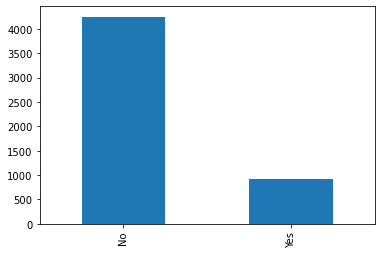

In [21]:
#Univariate Analysis of the target variable
rain_data['Raining Tomorrow'].value_counts().plot(kind='bar')

The Target variable has more ‘No’ values, hence it has an imbalanced. Imbalanced data might decrease the performance of the model. Since this is recorded data, presumably released by the meteorological department of Zimbabwe, it doesn’t make any sense when we try to balance the target variable, because the truthfulness of data might decrease. The data will be kept as it is.

<AxesSubplot:xlabel='Year', ylabel='Precipitation'>

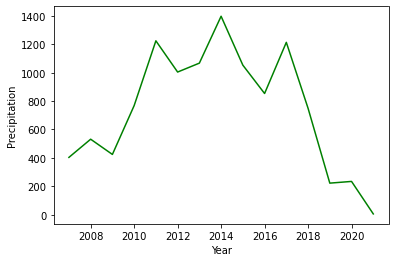

In [22]:
#Rainfall patern over the years
precip = pd.DataFrame(rain_data.groupby('Year')['Precipitation'].sum())
sns.lineplot(data=precip,x='Year',y='Precipitation',color='green')

<AxesSubplot:xlabel='Cloud Cover', ylabel='Precipitation'>

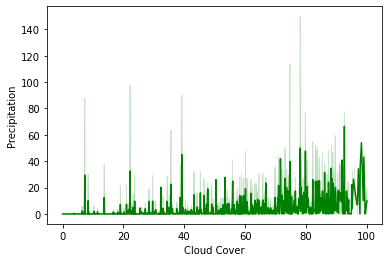

In [23]:
#Cloud Cover vs Precipitation
sns.lineplot(data=rain_data,x='Cloud Cover',y='Precipitation',color='green')

In the above plot, there is a positive correlation between the Cloud Cover feature and Precipitation feature. Increase in cloud cover increases the chances of rain.

<AxesSubplot:xlabel='Relative Humidity', ylabel='Precipitation'>

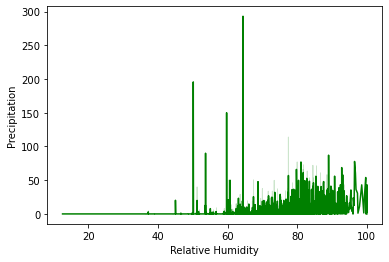

In [24]:
#Relative Humidity vs Precipitation
sns.lineplot(data=rain_data,x='Relative Humidity',y='Precipitation',color='green')

In the above line plot, the Relative Humidity feature is proportional to the Precipitation feature.

<AxesSubplot:xlabel='Relative Humidity', ylabel='Temperature'>

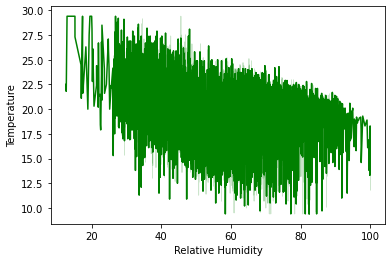

In [25]:
#Temperature vs Relative Humidity
sns.lineplot(data=rain_data,x='Relative Humidity',y='Temperature',color='green')

Temperature and Relative Humidity features are inversely proportional to each other.

# Encoding of Categorical Features

Raining Today and Raining Tomorrow columns have Yes and No values and these need to be converted into numeric values (zeros and ones). Machine learning algorithms and deep learning neural networks require that input and output variables are numbers. This means that categorical data must be encoded to numbers before we can use it to fit and evaluate a model. Below we use a replace method since the features have a cardinality of 2 unique values.

In [26]:
# Encoding of Categorical Features
rain_data['Raining Today'].replace({'No':0, 'Yes': 1}, inplace = True)
rain_data['Raining Tomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

In [27]:
rain_data

,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Raining Today,Raining Tomorrow,Year,Month,Day
0,29.9,10.9,21.2,0.0,16.60,109.518674,12.4,0.0,26.79,0,0,2007,9,1
1,27.6,11.1,19.4,0.0,10.70,109.518674,9.6,0.0,31.67,0,0,2007,9,2
2,28.6,15.2,22.5,0.0,21.40,109.518674,8.2,0.0,12.55,0,0,2007,9,3
3,26.2,11.2,19.7,0.0,25.00,109.518674,8.3,0.0,27.79,0,0,2007,9,4
4,27.1,12.9,20.1,0.0,14.80,109.518674,7.0,0.0,34.86,0,0,2007,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5169,30.1,19.1,25.8,0.0,26.80,82.420000,11.3,2.8,40.80,0,0,2021,10,25
5170,29.1,14.9,22.0,0.0,33.55,83.190000,11.3,5.0,61.58,0,0,2021,10,26
5171,28.1,15.9,21.7,0.0,22.30,101.100000,11.1,44.9,65.15,0,0,2021,10,27
5172,27.1,15.1,21.6,0.0,18.40,128.600000,13.5,34.8,56.20,0,0,2021,10,28


# Correlation

The correlation statistic helps to measure the strength of the relationship between two features. It helps to find how independent variables are affecting the dependent variables and also at the same time helps us to remove the variables which are highly correlated to each other.

<AxesSubplot:>

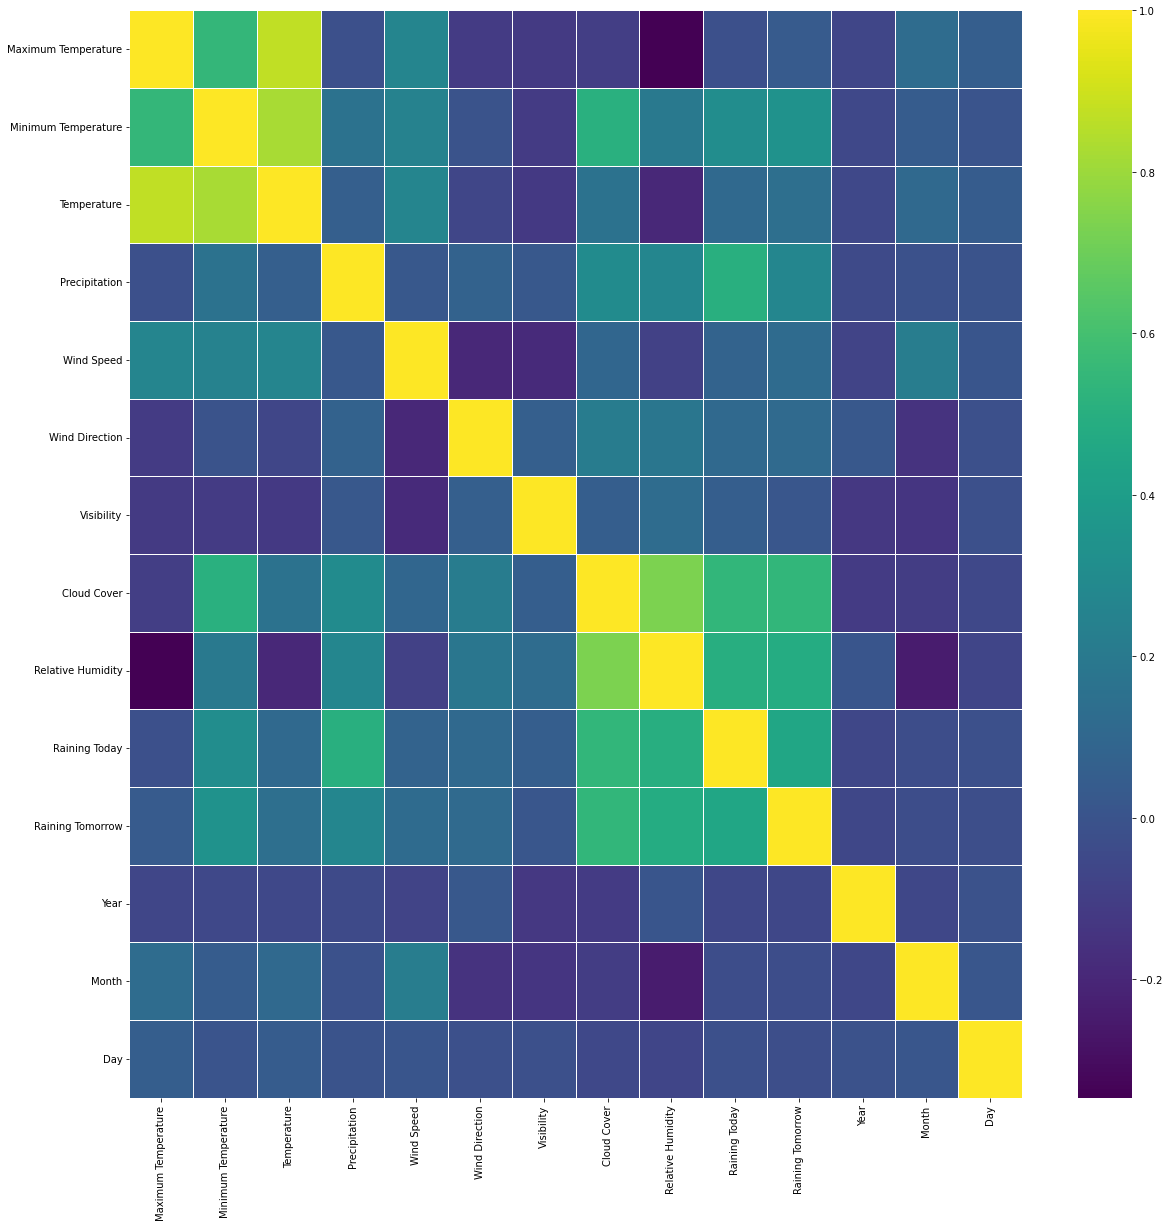

In [28]:
#Correlation
plt.figure(figsize=(20,20))
sns.heatmap(rain_data.corr(), linewidths=0.5, annot=False, fmt=".2f", cmap = 'viridis')

Strong correlations can be observed between the following features: Cloud Cover and Humidity, Wind Speed and Month, Minimum Temperature and Cloud Cover. Some weak correlations observed: Visibility and Year, Relative Humidity and Maximum Temperature, Month and Relative Humidity. In this case we will not drop any features as dropping them has been reducing the accuracy of the model.

In [29]:
# Splitting data into Independent Features and Dependent Features:
X = rain_data.drop(['Raining Tomorrow'],axis=1)
y = rain_data['Raining Tomorrow']

In the above script, X – Independent Features or Input features and y – Dependent Features or target label

# Checking Feature Importance

In [30]:
# Feature Importance
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)
etr_model.feature_importances_

array([0.05842615, 0.0614512 , 0.05352766, 0.02033956, 0.05424834,
       0.05140908, 0.05364942, 0.20309825, 0.13994286, 0.14523208,
       0.06242614, 0.04208007, 0.05416916])

<AxesSubplot:>

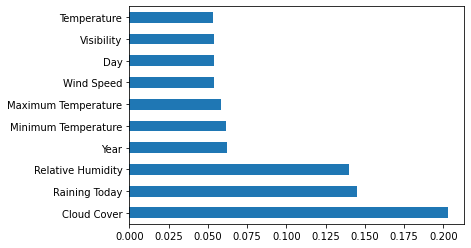

In [31]:
# visualization of the feature importance values
feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')

Surprisingly, month does not appear to an important feature for the model, against common knowledge that chances of rain are high between December and March. Cloud Cover, Relative Humidity and whether it is raining today are very important features to the model.

# Splitting data into training and testing set

We split the dataset into a training set (80% of the records) and a test set (20% of the records).

In [32]:
#Splitting Data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 4139
Length of Testing Data: 1035


# Feature Scaling

Through Feature Scaling we are able to standardize the independent features present in the data into a fixed range. It is part of data pre-processing to handle highly varying magnitudes or values or units. In the use case, wind is measured in km/hr, cloud cover as a percentage, rainfall(precipitation) in mm and temperature in degrees celsius hence the need to standardize the features. Below we use MinMaxScaler from Sklearn.

In [33]:
#Feature Scaling
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
X_train.shape

(4139, 13)

In [35]:
X_test.shape

(1035, 13)

# Model Building

Before training the model, we would like to establish how the hyperparameters should be configured. These parameters express important properties of the model such as its complexity or how fast it should learn (Machine Learning Mastery, 2019). The hyperparameters cannot be directly learned from the regular training process and hence should be fixed before the actual training process begins. These include: the penalty in Logistic Regression Classifier i.e. L1 or L2 regularization, the C hyperparameter for supporting vector machines. In this model, we use the GridSearchCV approach where the machine learning model is evaluated for a range of hyperparameter values. GridSearchCV searches for best set of hyperparameters from a grid of hyperparameters values.

In [36]:
#Grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# defining dataset
X, y = X_train, y_train

# defining models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag','saga']
penalty = ['l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# defining grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# summarizing results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.879039 using {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.877750 (0.014471) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'sag'}
0.877912 (0.014486) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.877831 (0.014418) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.877912 (0.014459) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.877750 (0.014403) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.877831 (0.014418) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.877831 (0.014418) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'lbfgs'}
0.877992 (0.014147) with: {'C': 10, 'penalty'

The best accuracy of 0.879039  is achieved by using the following hyperparameters {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}. C refers is the inverse of regularization strength; it must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

According to Scikit-learn, the solvers implemented in the class LogisticRegression are “liblinear”, “newton-cg”, “lbfgs”, “sag” and “saga”. The solver “liblinear” uses a coordinate descent algorithm which cannot learn a true multinomial (multiclass) model; instead, the optimization problem is decomposed in a “one-vs-rest” fashion so separate binary classifiers are trained for all classes.

The “lbfgs”, “sag” and “newton-cg” solvers only support l2 regularization hence the 0.00000 accuracies shown against l1 in the GridSearch above or no regularization, and are found to converge faster for some high-dimensional data. The “sag” solver uses Stochastic Average Gradient descent. It is faster than other solvers for large datasets, when both the number of samples and the number of features are large.

The “saga” solver is a variant of “sag” that also supports the non-smooth penalty="l1". This is therefore the solver of choice for sparse multinomial logistic regression. The “lbfgs” solver is recommended for use for small data-sets but for larger datasets its performance suffers.

L2 regularizations adds “absolute value of magnitude” of coefficient as penalty term to the loss function while L1 regularization adds “squared magnitude” of coefficient as penalty term to the loss function.

Sklearn library has a module called linear_model, which provides LogisticRegression class to train a model or a classifier and test it. Using the hyperparameters above, the model is trained as below:

In [37]:
# Model Training using Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(solver='saga', penalty = 'l1',C=1.0,random_state=0)
classifier_logreg.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=0, solver='saga')

In [38]:
#Model Testing
y_pred = classifier_logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [39]:
# Evaluating Model Performance:
from sklearn.metrics import accuracy_score
print("Accuracy Score is: {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score is: 0.8782608695652174


In [40]:
# Checking for Underfitting and Overfitting
print("Train Data Score: {}".format(classifier_logreg.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_logreg.score(X_test, y_test)))

Train Data Score: 0.881130707900459
Test Data Score: 0.8782608695652174


The accuracy score of training and testing data is comparable and almost equal. So, there is no question of underfitting and overfitting. And the model is generalizing well for new unseen data. The logistic Regression model accuracy score is 0.87826. The model does a very good job of predicting. The model shows no sign of Underfitting or Overfitting. This means the model generalizing well for unseen data.

<AxesSubplot:>

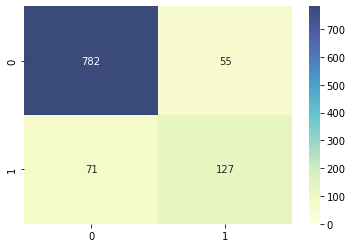

In [41]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0)

The confusion matrix above shows that the model classified 782 true negatives, 127 true positives, 55 false positives and 71 false negatives.

In [42]:
# Classification-report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       837
           1       0.70      0.64      0.67       198

    accuracy                           0.88      1035
   macro avg       0.81      0.79      0.80      1035
weighted avg       0.87      0.88      0.88      1035



The precision looks at how many are correctly classified among the classes. Precision, Recall and F1-scrore are higher in class 0 compared to class 1. The support is the number of occurence of the given class in the dataset, so we have 837 of class 0 and 198 of class 1, which is a really imbalanced dataset. Precision and recall are highly used for imbalanced dataset because in an highly imbalanced dataset, a very high accuracy can be meaningless.

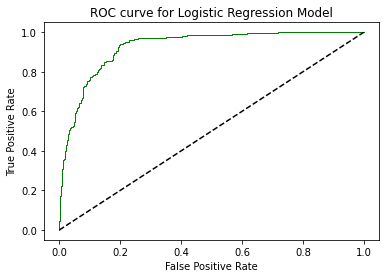

In [43]:
# Receiver operating characteristic(ROC) curve:
y_pred_logreg_proba = classifier_logreg.predict_proba(X_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

A Receiver Operating Characteristic (ROC) curve is a graphical plot used to show the diagnostic ability of binary classifiers. The ROC curve shows the trade-off between sensitivity (or True Positive Rate) and specificity (1 – False Positive Rate). The model gives a curve closer to the top-left corner, indicating a better performance. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [44]:
# Cross-Validation:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.87681159 0.88647343 0.86352657 0.87439614 0.88512696]
Average cross-validation score: 0.8772669388804186


The mean accuracy score of cross-validation is almost the same as the original model accuracy score which is 0.87826. So, the accuracy of the model may not be improved using cross-validation.

In [45]:
# Saving the Model and Scaling object with Pickle
import pickle

with open('scaler.pkl', 'wb') as file:

    pickle.dump(scaler, file) # scaler is an object of MinMaxScaler class.
    print('File saved to disk successfully')

File saved to disk successfully


In [46]:
with open('logreg.pkl', 'wb') as file:
    pickle.dump(classifier_logreg, file) # here classifier_logreg is trained model
    print('File saved to disk successfully')

File saved to disk successfully


# Conclusion and Remarks

The logistic Regression model accuracy score is 0.87826 (88%). The model does a very good job of predicting.
The model shows no sign of Underfitting or Overfitting. This means the model generalizing well for unseen data.
The mean accuracy score of cross-validation is almost the same as the original model accuracy score. So, the accuracy of the model may not be improved using Cross-validation.

# References

Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://www.javatpoint.com/logistic-regression-in-machine-learning

https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c

